In [1]:
pip install pandas numpy matplotlib seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
covid_data = pd.read_csv(url)

In [4]:
print(covid_data.info())
print(covid_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [5]:
covid_data_filtered = covid_data[['date', 'location', 'total_cases', 'total_deaths', 'total_vaccinations']]

In [6]:
covid_data_filtered = covid_data_filtered.fillna(0)

In [7]:
covid_data_filtered['date'] = pd.to_datetime(covid_data_filtered['date'])

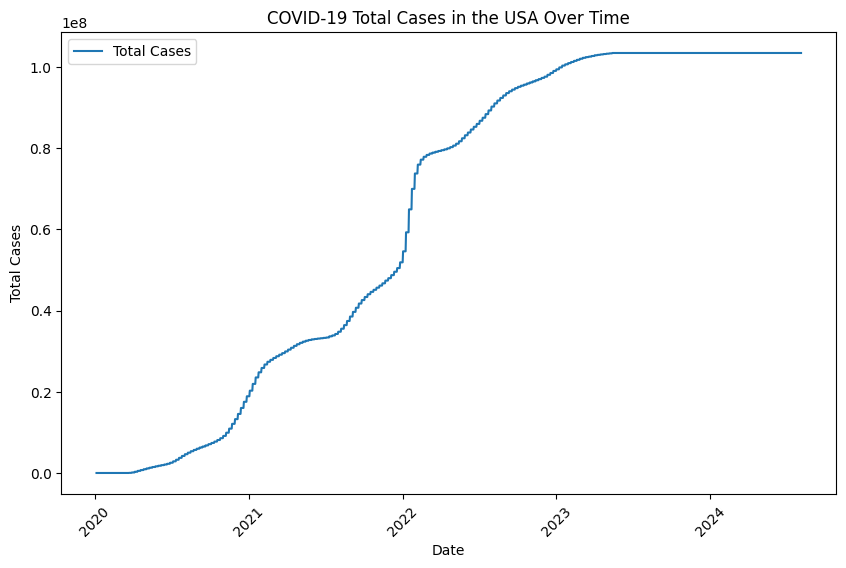

In [8]:
usa_data = covid_data_filtered[covid_data_filtered['location'] == 'United States']
plt.figure(figsize=(10,6))
plt.plot(usa_data['date'], usa_data['total_cases'], label='Total Cases')
plt.title('COVID-19 Total Cases in the USA Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.legend()
plt.show()

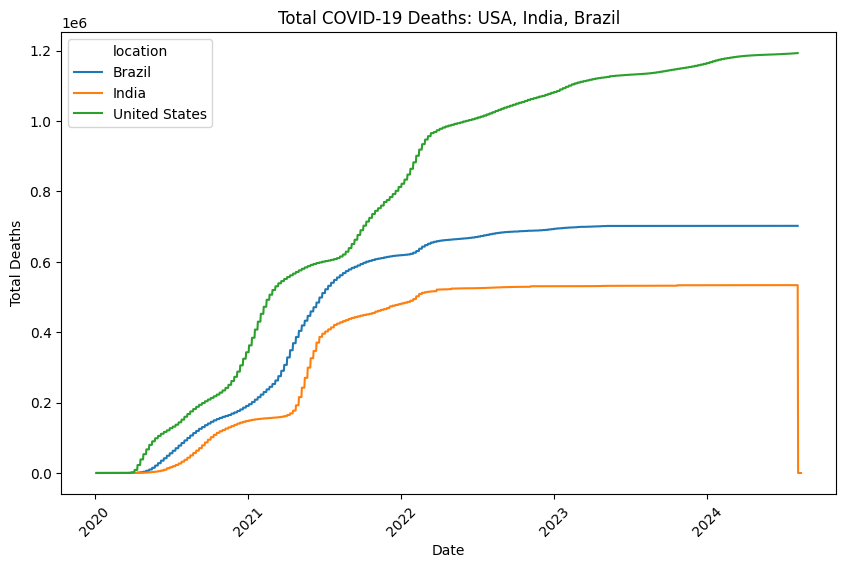

In [10]:
countries = ['United States', 'India', 'Brazil']
country_data = covid_data_filtered[covid_data_filtered['location'].isin(countries)]
plt.figure(figsize=(10,6))
sns.lineplot(x='date', y='total_deaths', hue='location', data=country_data)
plt.title('Total COVID-19 Deaths: USA, India, Brazil')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.show()


In [11]:
covid_data_filtered.to_csv('covid_data_cleaned.csv', index=False)

In [14]:
from google.colab import files
files.download('covid_data_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>